In [94]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns

import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [95]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

### HARDCODING THE IMPORT HEKA PATH

In [96]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

## examples of how to access data structure

    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]
    

# change file directory

In [97]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX


In [98]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
filedirSelNterm = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'


filenameMeta = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

# ENTER HARDCODED HERE: FROGS (FILES) TO USE

In [99]:
listofFiles = ['063','064','065','068','069',
    '100','101','102','103','104','105','106','107','108','109','110','111']#'100','101','102','103','104','105',

In [100]:
AllMetaData = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_excel(filenameMeta+'TEVCMetaSTFX'+listofFiles[i]+'-Selectivity.xlsx', sep="," )
    AllMetaData = AllMetaData.append(df_temp,ignore_index=True)
    #print(df_temp)
    
AllMetaData.to_csv(filedirSelNterm+'MetaSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

In [101]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [102]:
TESTDIC = {"Injection":[],"CellID":[],"StartSol":[],"VrStart":[],'Iminus85Start':[],"TestSol":[],"VrTest":[],'Iminus85Test':[]}

for i in range(len(AllMetaData['CellID'])): #range(28,29
    try:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
    except FileNotFoundError:
        continue
    else:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
        #print(df_temp.head())
        if len(df_temp) % 2 == 0:
            NewLoc = 0
            #print("{0} is Even".format(len(df_temp)))
            for m in range(int(len(df_temp)/2)):

                TESTDIC["Injection"].append(df_temp.loc[m,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2
                #print(NewLoc)
                #NewLoc = NewLoc + 10
                #print(NewLoc)

        else:
           # print("{0} is Odd".format(len(df_temp)))
            NewLoc = 0
            for m in range(int((len(df_temp)-1)/2)): #check if -1 works for more than 3 rows, for 5???
                TESTDIC["Injection"].append(df_temp.loc[NewLoc,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #TESTDIC["Iminus85Test"].dropna(how = 'any')
                
                #print(NewLoc)
                NewLoc = NewLoc +2

                
df = pd.DataFrame.from_dict(TESTDIC)

df = df.dropna(how='any')

df['Vd'] = df["VrTest"]-df["VrStart"]
df['Permeability'] = 1/(np.exp(df['Vd'].values*1000/25.6*-1))
df['Ratio'] = df["Iminus85Test"]/df["Iminus85Start"]


df.to_csv(filedirSelNterm+'RatioVrevSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

#print(df['Permeability'])


In [103]:
filedirSelNterm

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'

## common axis parameters

In [104]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# ENTER HERE HARDCODED THE DICTIONARY OF MUTANTS

In [105]:
ReNameAlanin ={'F84A':'mg738mg012',# 
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         #'T91A':'mg752mg012',
         #'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         #'G95A':'mg746mg012',
         #'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

ReNameChimera={ 'ctr A93':'mg419mg012',
#               'M4-DT1ABC':'mg733mg012',
#       'M4-DT1A':'mg734mg012',
#                'M4-DT1A':'mg734mg012',
#                'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
#                 'M4+M4-DT1A':'mg419mg734mg012',
#                'M4+M4-DT1B':'mg419mg735mg012',
#                'M4+M4-DT1C':'mg419mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
              }

#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [106]:
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg419mg012,STFX063014,NaGluSel1,0.005257,1.082743e-05,KGluSel,-0.039298,1.808445e-06,-0.044554,0.175448,0.167024
3,mg418mg012,STFX063013,NaGluSel1,-0.009738,1.167834e-06,KGluSel,-0.005735,1.194372e-06,0.004003,1.169253,1.022724
6,mg418mg012,STFX063012,NaGluSel1,-0.008068,1.241020e-06,KGluSel,-0.003690,1.261510e-06,0.004379,1.186534,1.016511
9,mg418mg419mg012,STFX063011,NaGluSel1,0.008984,7.778207e-06,KGluSel,-0.025637,2.249858e-06,-0.034621,0.258626,0.289251
12,uninjected,STFX063010,NaGluSel1,-0.012328,8.655528e-08,KGluSel,0.002457,2.743892e-07,0.014786,1.781697,3.170103


## create arrays for each recording condition and RNA type

In [107]:
Allmg419Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values
Allmg419K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values
Allmg419Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values

Allmg742Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values
Allmg742K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values
Allmg742Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values


print(type(Allmg419Nmg))
#df[np.asarray(np.where(df == 'LiGluSel'))[0,-1]]

<class 'numpy.ndarray'>


error in LiGLu in STFX06026 for display....

# ENTER HERE HARDCODED THE CELL YOU WANT TO PRINT

write a loop to pick recording based on mean Current NAGlu, Vrev and change in Vrev dependent on solution switch

## !!!!!!  ACTION !!! Allmg419Li[1] --> change the number in the [] parenthesis for chosing a different representative trace

## control

In [108]:
Rec_mg419Li = Allmg419Li[1]
File_mg419Li = "Selectivity-TEVC-"+Rec_mg419Li+".txt"
Rec_mg419LiString = Rec_mg419Li[:7] + "-" + Rec_mg419Li[7:]

Rec_mg419K = Allmg419K[0]
File_mg419K = "Selectivity-TEVC-"+Rec_mg419K+".txt"
Rec_mg419KString = Rec_mg419K[:7] + "-" + Rec_mg419K[7:]

Rec_mg419Nmg = Allmg419Nmg[1]
File_mg419Nmg = "Selectivity-TEVC-"+Rec_mg419Nmg+".txt"
Rec_mg419NmgString = Rec_mg419Nmg[:7] + "-" + Rec_mg419Nmg[7:]

## chimera

In [109]:
Rec_mg742Li = Allmg742Li[1]
File_mg742Li = "Selectivity-TEVC-"+Rec_mg742Li+".txt"
Rec_mg742LiString = Rec_mg742Li[:7] + "-" + Rec_mg742Li[7:]

Rec_mg742K = Allmg742K[1]
File_mg742K = "Selectivity-TEVC-"+Rec_mg742K+".txt"
Rec_mg742KString = Rec_mg742K[:7] + "-" + Rec_mg742K[7:]

Rec_mg742Nmg = Allmg742Nmg[1]
File_mg742Nmg = "Selectivity-TEVC-"+Rec_mg742Nmg+".txt"
Rec_mg742NmgString = Rec_mg742Nmg[:7] + "-" + Rec_mg742Nmg[7:]

# change labels for specific to recording
if this error appears, run the code again from the top as you are in the wrong folder (change directory happens twice in this code): OSError: Selectivity-TEVC-STFX107008.txt not found.

## control

In [110]:
labels_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t',  dtype=str)[1:,24]

print(labels_Rec_mg419Nmg)
# #print(raw_data)

['CellIDRec' 'Injection' 'CultivationSol' 'DaysPostInj' 'Rating'
 'Voltage_1' 'Voltage_2' 'Voltage_3' 'Voltage_4' 'Voltage_5' 'Voltage_6'
 'Voltage_7' 'Voltage_8' 'Voltage_9' 'MeanSTEPs_1' 'MeanSTEPs_2'
 'MeanSTEPs_3' 'MeanSTEPs_4' 'MeanSTEPs_5' 'MeanSTEPs_6' 'MeanSTEPs_7'
 'MeanSTEPs_8' 'MeanSTEPs_9' 'LEAKMinus85' 'TestSol' 'Vrev' 'CurMinus85'
 'SortIndexSolutions']


## chimera

In [111]:
labels_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t',  dtype=str)[1:,24]


In [112]:
Solutions_Rec_mg742Nmg

array(['NaGluSel1', 'KGluSel', 'NaGluSel2', 'NmgGluSel', 'LiGluSel',
       'NaGluSel3', 'NaGluSel4'], dtype='<U21')

# CHANGE DIRECTORY

In [113]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [114]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedirMeta = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'
#filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedirMeta)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/


# find filename on meta data sheet

## find Filename control 

In [115]:
#find the .dat file name in the MetaData sheet of the corresponding recording
DatFile_mg419Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419Li)]
DatFile_mg419K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419K)]
DatFile_mg419Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419Nmg)]

In [116]:
DatFile_mg419Nmg

80    20181121
Name: Filename, dtype: int64

## find Filename chimera 

In [117]:
DatFile_mg742Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742Li)]
DatFile_mg742K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742K)]
DatFile_mg742Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742Nmg)]

In [118]:
DatFile_mg419Li

80    20181121
Name: Filename, dtype: int64

# load dat files

## load dat files control

In [119]:
loadFile_mg419Li = heka_reader.Bundle(str(DatFile_mg419Li.iloc[0])+'.dat')
loadFile_mg419K = heka_reader.Bundle(str(DatFile_mg419K.iloc[0])+'.dat')
loadFile_mg419Nmg = heka_reader.Bundle(str(DatFile_mg419Nmg.iloc[0])+'.dat')

## load dat files chimera

In [120]:
# Load a .dat file
loadFile_mg742Li = heka_reader.Bundle(str(DatFile_mg742Li.iloc[0])+'.dat')
loadFile_mg742K = heka_reader.Bundle(str(DatFile_mg742K.iloc[0])+'.dat')
loadFile_mg742Nmg = heka_reader.Bundle(str(DatFile_mg742Nmg.iloc[0])+'.dat')

# find Group of recording via name

## find group of recording for control

In [121]:
for element in range(50):
    if loadFile_mg419Li.pul[element].Label == Rec_mg419LiString:
        Group_mg419Li = element
        print(Group_mg419Li)
        break        
        
for element in range(50):
    if loadFile_mg419K.pul[element].Label == Rec_mg419KString:
        Group_mg419K = element
        break
        
for element in range(50):
    if loadFile_mg419Nmg.pul[element].Label == Rec_mg419NmgString:
        Group_mg419Nmg = element
        break        

10


## find group of recording for chimera

In [122]:
for element in range(50):
    if loadFile_mg742Li.pul[element].Label == Rec_mg742LiString:
        Group_mg742Li = element
        print(Group_mg742Li)
        break

for element in range(50):
    if loadFile_mg742K.pul[element].Label == Rec_mg742KString:
        Group_mg742K = element
        break 
        
for element in range(50):
    if loadFile_mg742Nmg.pul[element].Label == Rec_mg742NmgString:
        Group_mg742Nmg = element
        break              

9


# find series of three replicates for specific recording conditions

## find series for control

In [123]:
VarNaGlu_mg419Li = Solutions_Rec_mg419Li[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg419Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesLi_mg419Li  = SeriesLi_mg419Li[0].split(",")
SeriesNa_mg419Li = AllMetaData[VarNaGlu_mg419Li][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesNa_mg419Li  = SeriesNa_mg419Li[0].split(",")

#AllMetaData['NaGluSel4'][(AllMetaData.CellID == Rec_mg419Li)].values

VarNaGlu_mg419K = Solutions_Rec_mg419K[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]-1]
SeriesK_mg419K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg419K)].values
SeriesK_mg419K  = SeriesK_mg419K[0].split(",")
SeriesNa_mg419K = AllMetaData[VarNaGlu_mg419K][(AllMetaData.CellID == Rec_mg419K)].values
SeriesNa_mg419K  = SeriesNa_mg419K[0].split(",")

VarNaGlu_mg419Nmg = Solutions_Rec_mg419Nmg[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg419Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg419Nmg)].values
SeriesNmg_mg419Nmg  = SeriesNmg_mg419Nmg[0].split(",")
SeriesNa_mg419Nmg = AllMetaData[VarNaGlu_mg419Nmg][(AllMetaData.CellID == Rec_mg419Nmg)].values
SeriesNa_mg419Nmg  = SeriesNa_mg419Nmg[0].split(",")


print(SeriesNa_mg419Li)

['11', '12', '13']


## find series for chimera

# mg742

In [124]:
VarNaGlu_mg742Li = Solutions_Rec_mg742Li[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg742Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesLi_mg742Li  = SeriesLi_mg742Li[0].split(",")
SeriesNa_mg742Li = AllMetaData[VarNaGlu_mg742Li][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesNa_mg742Li  = SeriesNa_mg742Li[0].split(",")

VarNaGlu_mg742K = Solutions_Rec_mg742K[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]-1]
SeriesK_mg742K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg742K)].values
SeriesK_mg742K  = SeriesK_mg742K[0].split(",")
SeriesNa_mg742K = AllMetaData[VarNaGlu_mg742K][(AllMetaData.CellID == Rec_mg742K)].values
SeriesNa_mg742K  = SeriesNa_mg742K[0].split(",")

VarNaGlu_mg742Nmg = Solutions_Rec_mg742Nmg[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg742Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg742Nmg)].values
SeriesNmg_mg742Nmg  = SeriesNmg_mg742Nmg[0].split(",")
SeriesNa_mg742Nmg = AllMetaData[VarNaGlu_mg742Nmg][(AllMetaData.CellID == Rec_mg742Nmg)].values
SeriesNa_mg742Nmg  = SeriesNa_mg742Nmg[0].split(",")



print(SeriesNa_mg742Nmg)

# how to find which recording came beforehand? Solutiontest

['13', '14', '15']


# voltage trace (only necessary for displaying Raw traces)

In [125]:
Vol_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    Vol_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,1])
    
Vol_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    Vol_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,1])
    
Vol_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    Vol_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,1])
    
Vol_mg419LiMEAN =[]
for m in range(0,9):
    Vol_mg419LiMEAN.append(((Vol_mg419Li1[m]+Vol_mg419Li2[m]+Vol_mg419Li3[m])/3)*1000)

# current traces (only necessary for displaying Raw traces)

### NaGlu mg419 and LiGlu mg419

In [126]:
INa_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    INa_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,0])
    
INa_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    INa_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,0])
    
INa_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    INa_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,0])
    
INa_mg419LiMEAN =[]
for m in range(0,9):
    INa_mg419LiMEAN.append(((INa_mg419Li1[m]+INa_mg419Li2[m]+INa_mg419Li3[m])/3)*1000000)

In [127]:
ILi_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    ILi_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[0])-1,i,0])
    
ILi_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    ILi_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[1])-1,j,0])
    
ILi_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    ILi_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[2])-1,k,0])
    
ILi_mg419LiMEAN =[]
for m in range(0,9):
    ILi_mg419LiMEAN.append(((ILi_mg419Li1[m]+ILi_mg419Li2[m]+ILi_mg419Li3[m])/3)*1000000)

# Transform Data from Selectivity_Ratio sheet, which were analyzed via Matlab

## transform IV mean values of mg419 LiGLu

In [128]:
################### Li #######
Voltages_mg419Li = []
Currents_mg419Li = []

for volt in range(0,len(raw_data_Rec_mg419Li)):
    Voltages_mg419Li.append([raw_data_Rec_mg419Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg419Li.append([raw_data_Rec_mg419Li[volt,14:23]])

#change to mV and uA    
Voltages_mg419LiInmV = np.multiply(1000,Voltages_mg419Li) #becomes a np.array with shape 7,1,9 
Currents_mg419LiInuA = np.multiply(1000000,Currents_mg419Li)    
  
#reshape Array
Voltages_mg419LiInmV = Voltages_mg419LiInmV.reshape(Voltages_mg419LiInmV.shape[0],Voltages_mg419LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg419LiInuA = Currents_mg419LiInuA.reshape(Currents_mg419LiInuA.shape[0],Currents_mg419LiInuA.shape[2])   


################### K #######
Voltages_mg419K = []
Currents_mg419K = []

for volt in range(0,len(raw_data_Rec_mg419K)):
    Voltages_mg419K.append([raw_data_Rec_mg419K[volt,5:14]]) #TODO: CHANGE
    Currents_mg419K.append([raw_data_Rec_mg419K[volt,14:23]])

#change to mV and uA    
Voltages_mg419KInmV = np.multiply(1000,Voltages_mg419K) #becomes a np.array with shape 7,1,9 
Currents_mg419KInuA = np.multiply(1000000,Currents_mg419K)    
  
#reshape Array
Voltages_mg419KInmV = Voltages_mg419KInmV.reshape(Voltages_mg419KInmV.shape[0],Voltages_mg419KInmV.shape[2]) #reshape 7,1,9 
Currents_mg419KInuA = Currents_mg419KInuA.reshape(Currents_mg419KInuA.shape[0],Currents_mg419KInuA.shape[2])   

################### Nmg #######

Voltages_mg419Nmg = []
Currents_mg419Nmg = []

for volt in range(0,len(raw_data_Rec_mg419Nmg)):
    Voltages_mg419Nmg.append([raw_data_Rec_mg419Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg419Nmg.append([raw_data_Rec_mg419Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg419NmgInmV = np.multiply(1000,Voltages_mg419Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg419NmgInuA = np.multiply(1000000,Currents_mg419Nmg)    
  
#reshape Array
Voltages_mg419NmgInmV = Voltages_mg419NmgInmV.reshape(Voltages_mg419NmgInmV.shape[0],Voltages_mg419NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg419NmgInuA = Currents_mg419NmgInuA.reshape(Currents_mg419NmgInuA.shape[0],Currents_mg419NmgInuA.shape[2])   





## transform IV mean values of mg419 LiGLu


In [129]:
####################### Li ##### 
Voltages_mg742Li = []
Currents_mg742Li = []

for volt in range(0,len(raw_data_Rec_mg742Li)):
    Voltages_mg742Li.append([raw_data_Rec_mg742Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg742Li.append([raw_data_Rec_mg742Li[volt,14:23]])

#change to mV and uA    
Voltages_mg742LiInmV = np.multiply(1000,Voltages_mg742Li) #becomes a np.array with shape 7,1,9 
Currents_mg742LiInuA = np.multiply(1000000,Currents_mg742Li)    
  
#reshape Array
Voltages_mg742LiInmV = Voltages_mg742LiInmV.reshape(Voltages_mg742LiInmV.shape[0],Voltages_mg742LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg742LiInuA = Currents_mg742LiInuA.reshape(Currents_mg742LiInuA.shape[0],Currents_mg742LiInuA.shape[2])   

####################### K ##### 
Voltages_mg742K = []
Currents_mg742K = []

for volt in range(0,len(raw_data_Rec_mg742K)):
    Voltages_mg742K.append([raw_data_Rec_mg742K[volt,5:14]]) #TODO: CHANGE
    Currents_mg742K.append([raw_data_Rec_mg742K[volt,14:23]])

#change to mV and uA    
Voltages_mg742KInmV = np.multiply(1000,Voltages_mg742K) #becomes a np.array with shape 7,1,9 
Currents_mg742KInuA = np.multiply(1000000,Currents_mg742K)    
  
#reshape Array
Voltages_mg742KInmV = Voltages_mg742KInmV.reshape(Voltages_mg742KInmV.shape[0],Voltages_mg742KInmV.shape[2]) #reshape 7,1,9 
Currents_mg742KInuA = Currents_mg742KInuA.reshape(Currents_mg742KInuA.shape[0],Currents_mg742KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg742Nmg = []
Currents_mg742Nmg = []

for volt in range(0,len(raw_data_Rec_mg742Nmg)):
    Voltages_mg742Nmg.append([raw_data_Rec_mg742Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg742Nmg.append([raw_data_Rec_mg742Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg742NmgInmV = np.multiply(1000,Voltages_mg742Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg742NmgInuA = np.multiply(1000000,Currents_mg742Nmg)    
  
#reshape Array
Voltages_mg742NmgInmV = Voltages_mg742NmgInmV.reshape(Voltages_mg742NmgInmV.shape[0],Voltages_mg742NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg742NmgInuA = Currents_mg742NmgInuA.reshape(Currents_mg742NmgInuA.shape[0],Currents_mg742NmgInuA.shape[2])   


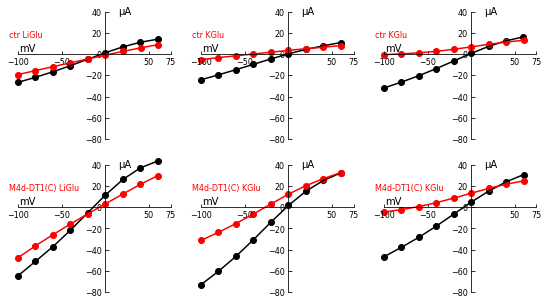

In [152]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
# if nrows = 2 axes[] counts rows and not col and limits axess handling

axes[0][0] = plt.subplot(2,3,1)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][1] = plt.subplot(2,3,2)
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[0][2] = plt.subplot(2,3,3)
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    

# ###################################### mg742 
axes[1][0] = plt.subplot(2,3,4)
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][1] = plt.subplot(2,3,5)
plt.plot(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][2] = plt.subplot(2,3,6)
plt.plot(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]
ylimSet = [-80,40]

#add ylim

for row in range(2): 
    for col in range(3):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        axes[row][col].set_ylim(ylimSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.75)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


axes[0][0].text(-110, 15.8, 'ctr LiGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][0].text(-110, 15.8, 'M4d-DT1(C) LiGlu',color='red',fontsize=AxisTickLabelSize)

axes[0][1].text(-110, 15.8, 'ctr KGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][1].text(-110, 15.8, 'M4d-DT1(C) KGlu',color='red',fontsize=AxisTickLabelSize)

axes[0][2].text(-110, 15.8, 'ctr KGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][2].text(-110, 15.8, 'M4d-DT1(C) KGlu',color='red',fontsize=AxisTickLabelSize)


plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"IVcurvesSelectivity-chimera"+'.pdf')


In [149]:
AxisTickLabelSize
AxisLabelSize

10